# Covid data exploration



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, chi2, f_regression
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

In [ ]:
dataset = pd.read_csv('usa_dataset.csv', index_col=0)
dataset

,COVID-19 Deaths,Total Deaths,Percent of Expected Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",flights,commercial_flights,People Screened at Airports,US International Commercial Flights,Nr People staying home,Nr People not staying home,Nr of trips,Max_Temp,Min_Temp,Temperature,Precipitation,Wind_Speed,Wind_Direction,Visibility,Cloud_Cover,Relative_Humidity,Rain,Clear,Partially_cloudy
Start Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-29,0,60163,98,4105,0,434,4539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,0,60720,97,4153,0,474,4627,166742.000000,109429.000000,14184129.0,30057.0,7.192058e+07,2.552469e+08,1.088398e+09,11.360000,4.200000,7.800000,2.832000,23.320000,224.858000,14.900000,68.340000,69.862000,0.000000,0.000000,0.600000
2020-01-12,2,59350,97,4064,2,467,4531,176103.000000,111337.142857,14257262.0,28561.0,6.644032e+07,2.607271e+08,1.182970e+09,12.714286,2.814286,7.628571,2.490000,30.742857,204.608571,15.628571,56.000000,64.357143,0.142857,0.000000,0.714286
2020-01-19,1,59150,99,3917,0,499,4417,176331.285714,111249.571429,14004403.0,28528.0,6.643305e+07,2.607344e+08,1.195811e+09,9.042857,2.542857,5.928571,0.911429,28.057143,208.607143,14.428571,69.757143,69.388571,0.142857,0.000000,0.714286
2020-01-26,0,58821,99,3817,0,481,4298,181449.000000,111437.857143,13596881.0,28360.0,6.649498e+07,2.606725e+08,1.189276e+09,6.542857,-0.914286,2.842857,4.457143,21.271429,199.001429,15.685714,48.000000,61.532857,0.142857,0.285714,0.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-07,4716,51202,89,4711,2515,7,6917,161088.714286,71319.142857,7787341.0,13354.0,7.294651e+07,2.543741e+08,1.226780e+09,8.685714,0.571429,4.985714,1.368571,28.914286,266.654286,15.471429,28.600000,45.037143,0.000000,0.428571,0.428571
2021-03-14,3550,43636,76,3716,1866,3,5402,156194.000000,73161.857143,8769096.0,13504.0,7.106915e+07,2.571704e+08,1.243423e+09,19.414286,7.071429,12.628571,0.000000,28.185714,207.351429,15.985714,60.571429,38.648571,0.000000,0.000000,1.000000
2021-03-21,2716,36729,65,2821,1412,7,4131,157258.571429,74672.285714,9202547.0,13487.0,6.855276e+07,2.596868e+08,1.249915e+09,11.414286,3.657143,7.542857,1.347143,25.185714,123.198571,14.800000,64.657143,55.881429,0.142857,0.285714,0.571429


In [ ]:
dataset.drop(dataset.loc[dataset.index == '2019-12-29'].index, inplace=True)
dataset.shape

(66, 26)

In [ ]:
dataset.head()

,COVID-19 Deaths,Total Deaths,Percent of Expected Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",flights,commercial_flights,People Screened at Airports,US International Commercial Flights,Nr People staying home,Nr People not staying home,Nr of trips,Max_Temp,Min_Temp,Temperature,Precipitation,Wind_Speed,Wind_Direction,Visibility,Cloud_Cover,Relative_Humidity,Rain,Clear,Partially_cloudy
Start Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-05,0,60720,97,4153,0,474,4627,166742.000000,109429.000000,14184129.0,30057.0,7.192058e+07,2.552469e+08,1.088398e+09,11.360000,4.200000,7.800000,2.832000,23.320000,224.858000,14.900000,68.340000,69.862000,0.000000,0.000000,0.600000
2020-01-12,2,59350,97,4064,2,467,4531,176103.000000,111337.142857,14257262.0,28561.0,6.644032e+07,2.607271e+08,1.182970e+09,12.714286,2.814286,7.628571,2.490000,30.742857,204.608571,15.628571,56.000000,64.357143,0.142857,0.000000,0.714286
2020-01-19,1,59150,99,3917,0,499,4417,176331.285714,111249.571429,14004403.0,28528.0,6.643305e+07,2.607344e+08,1.195811e+09,9.042857,2.542857,5.928571,0.911429,28.057143,208.607143,14.428571,69.757143,69.388571,0.142857,0.000000,0.714286
2020-01-26,0,58821,99,3817,0,481,4298,181449.000000,111437.857143,13596881.0,28360.0,6.649498e+07,2.606725e+08,1.189276e+09,6.542857,-0.914286,2.842857,4.457143,21.271429,199.001429,15.685714,48.000000,61.532857,0.142857,0.285714,0.714286
2020-02-02,2,59455,100,3820,1,521,4342,174770.285714,106937.285714,13601288.0,27610.0,6.482828e+07,2.623391e+08,1.191705e+09,8.871429,1.471429,5.071429,0.277143,22.342857,195.221429,15.471429,69.842857,62.968571,0.285714,0.000000,0.857143


## pearson correlation

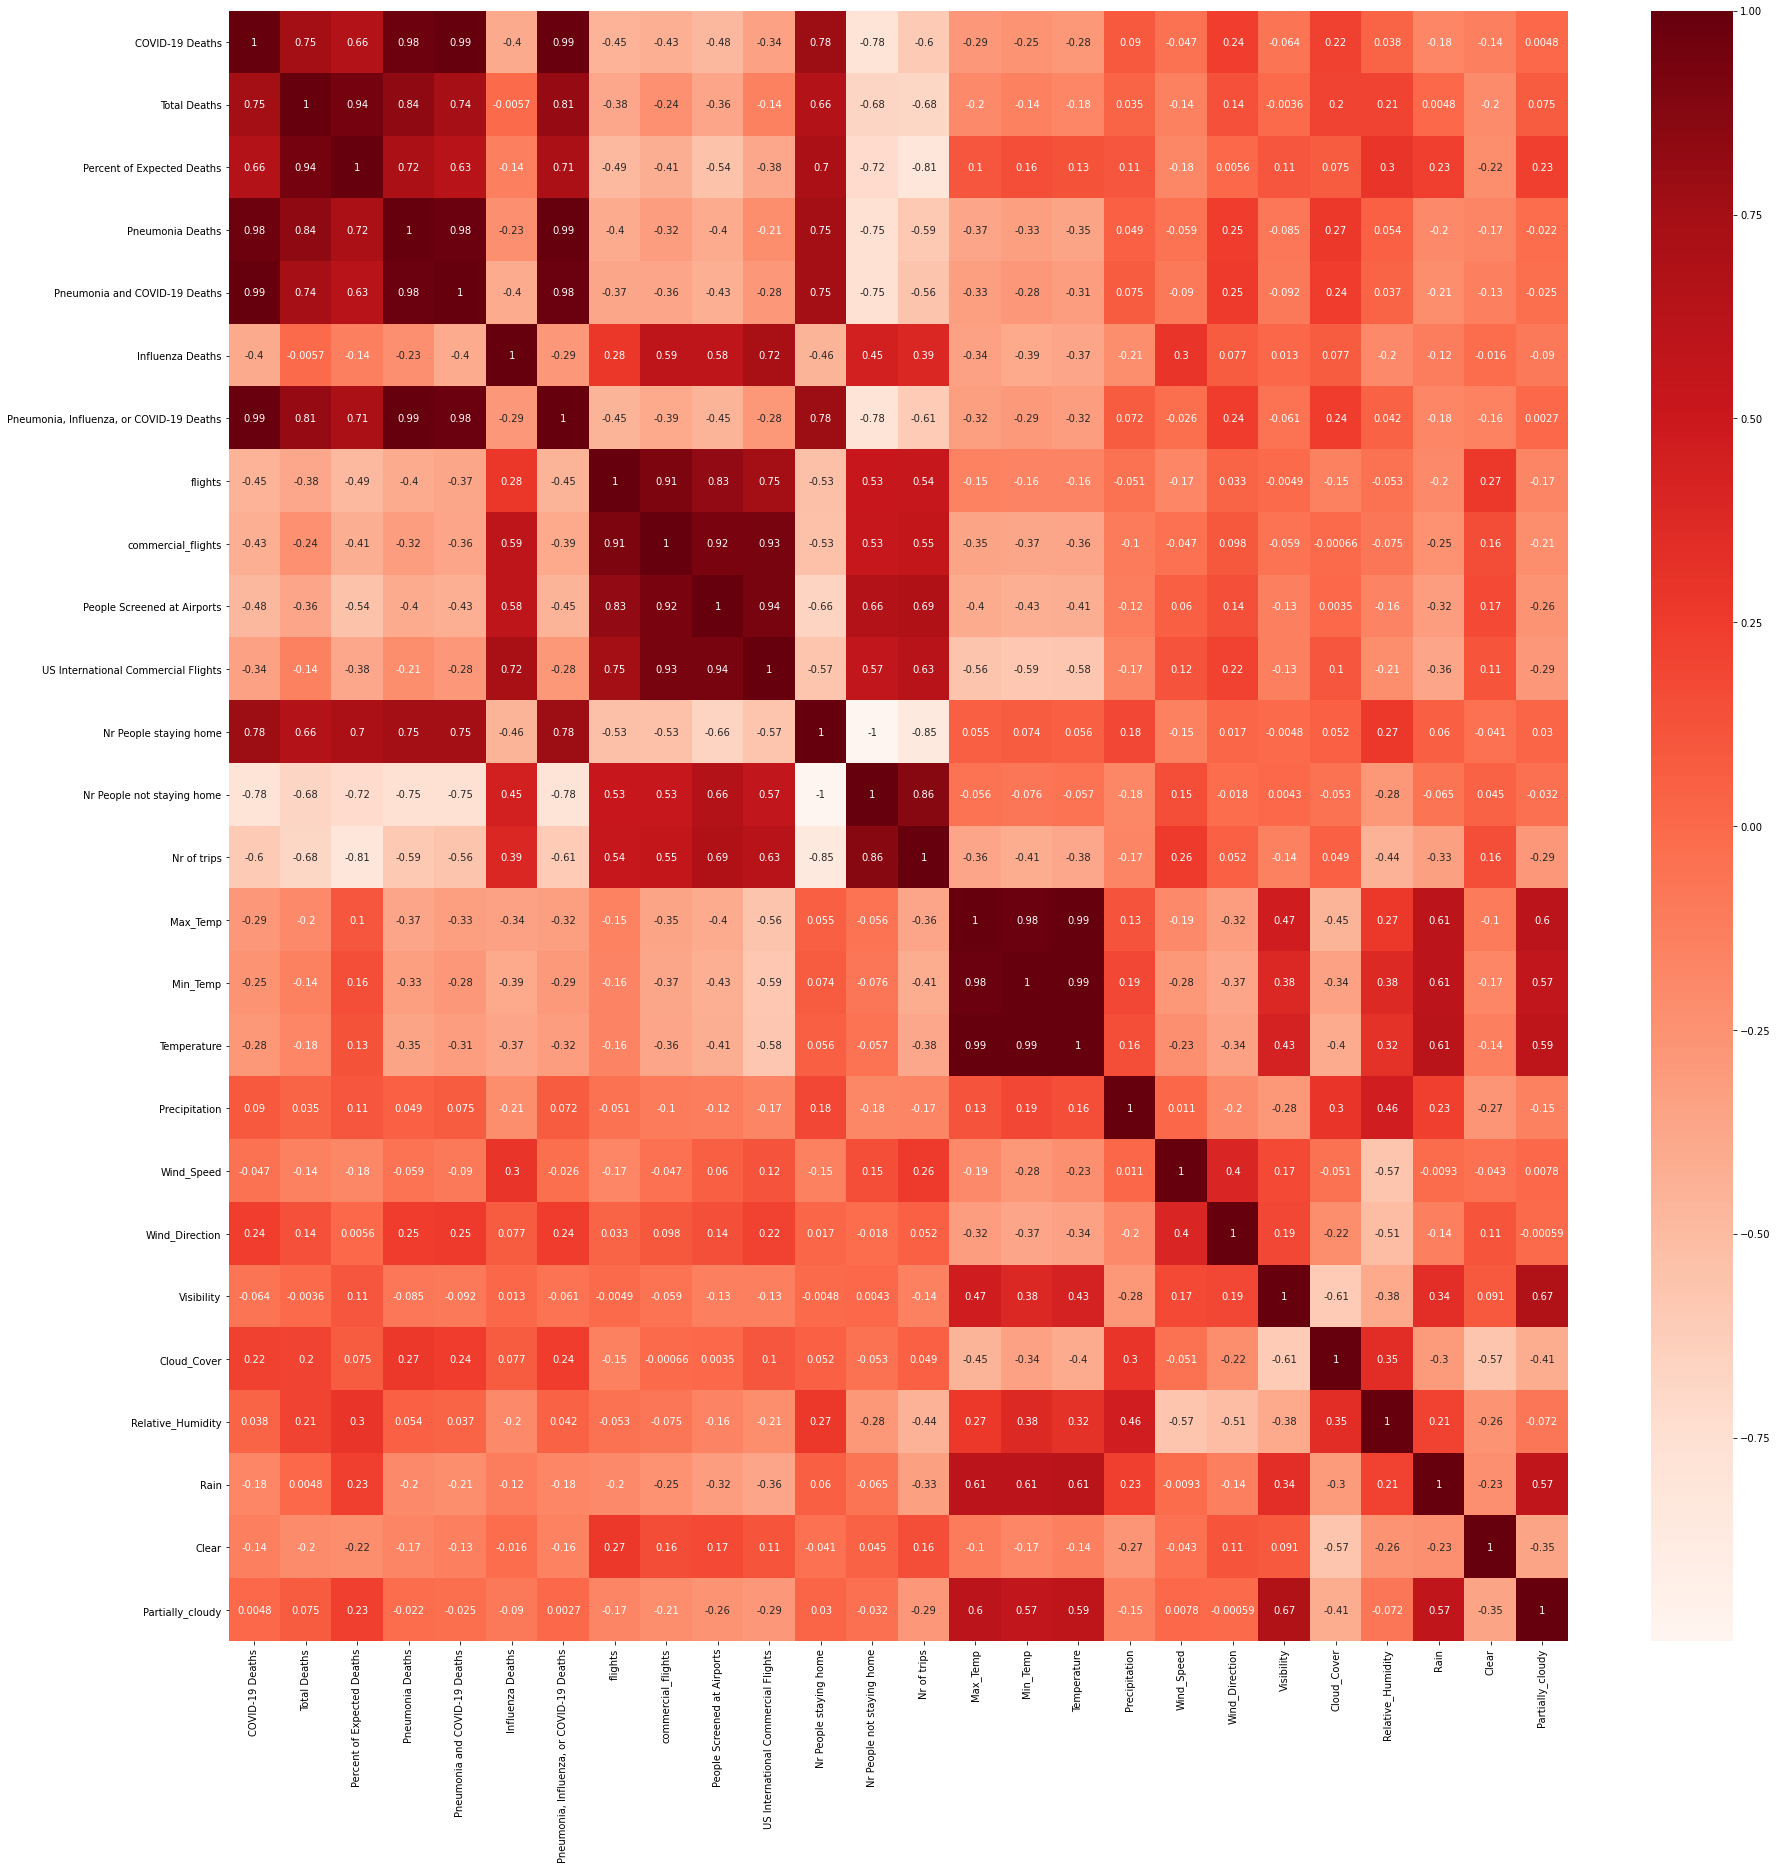

Start Date
2020-01-05    474
2020-01-12    467
2020-01-19    499
2020-01-26    481
2020-02-02    521
             ... 
2021-02-28     22
2021-03-07      7
2021-03-14      3
2021-03-21      7
2021-03-28      8
Name: Influenza Deaths, Length: 65, dtype: int64

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(30,30))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
#Correlation with output variable
cor_target = abs(dataset['Influenza Deaths'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

In [ ]:
cor_target

data
2020-03-01      0.0
2020-03-08      0.0
2020-03-15      0.0
2020-03-22     14.0
2020-03-29    105.0
              ...  
2021-03-28     69.0
2021-04-04     42.0
2021-04-11     37.0
2021-04-18     29.0
2021-04-25      7.0
Name: obitos, Length: 61, dtype: float64

Calcular as features com correlação maior que 0.95 entre si para remover uma delas

In [ ]:
c = set()

for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) > 0.95:
            colname = cor.columns[i]  
            c.add(colname)

In [ ]:
c

{'Min_Temp',
 'Nr People not staying home',
 'Pneumonia Deaths',
 'Pneumonia and COVID-19 Deaths',
 'Pneumonia, Influenza, or COVID-19 Deaths',
 'Temperature'}

Como entendemos que temos muitas features, após observar a matriz de correlações de pearson, fizemos um filtro preliminas de features, eliminando features cuja correlação fosse maior que +/-0.95.

Correlações Altas (remover features da direita)
*   'Pneumonia, Influenza, or COVID-19 Deaths'<-(-0.99/0.98/0.98)->'COVID-19 Deaths', 'Pneumonia Deaths','Pneumonia and COVID-19 Deaths'
*   'Nr People not staying home'<-(-1)->'Nr People staying home'
*   Temperature<-(0.99)->'Max_Temp','Min_Temp'

In [ ]:
dataset.columns

Index(['COVID-19 Deaths', 'Total Deaths', 'Percent of Expected Deaths',
       'Pneumonia Deaths', 'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths', 'flights',
       'commercial_flights', 'People Screened at Airports',
       'US International Commercial Flights', 'Nr People staying home',
       'Nr People not staying home', 'Nr of trips', 'Max_Temp', 'Min_Temp',
       'Temperature', 'Precipitation', 'Wind_Speed', 'Wind_Direction',
       'Visibility', 'Cloud_Cover', 'Relative_Humidity', 'Rain', 'Clear',
       'Partially_cloudy'],
      dtype='object')

In [ ]:
dataset = dataset.drop(columns=['COVID-19 Deaths', 'Pneumonia Deaths', 'Pneumonia and COVID-19 Deaths',
                                'Pneumonia, Influenza, or COVID-19 Deaths', 'Nr People staying home', 'Max_Temp', 'Min_Temp'])

In [ ]:
dataset.shape

(66, 19)

## Feature selection com SelectKBest

In [ ]:
df_data = dataset.drop(columns='Influenza Deaths')
df_label = dataset['Influenza Deaths']

In [ ]:
# Feature extraction
# test = SelectKBest(score_func=chi2)
# fit = test.fit_transform(df_data, df_label)
sel_f = SelectKBest(f_regression, k=10)
X_train_f = sel_f.fit_transform(df_data, df_label)
print(sel_f.get_support())


[False False  True  True  True  True  True  True  True  True  True False
 False False  True False False False]


flights /	commercial_flights /	People Screened at Airports /	US International Commercial Flights /	Nr People not staying home /	Nr of trips /	Temperature	/Precipitation /	Wind_Speed /
	Relative_Humidity

In [ ]:
df_data

,Total Deaths,Percent of Expected Deaths,flights,commercial_flights,People Screened at Airports,US International Commercial Flights,Nr People not staying home,Nr of trips,Temperature,Precipitation,Wind_Speed,Wind_Direction,Visibility,Cloud_Cover,Relative_Humidity,Rain,Clear,Partially_cloudy
Start Date,,,,,,,,,,,,,,,,,,
2020-01-05,60720,97,166742.000000,109429.000000,14184129.0,30057.0,2.552469e+08,1.088398e+09,7.800000,2.832000,23.320000,224.858000,14.900000,68.340000,69.862000,0.000000,0.000000,0.600000
2020-01-12,59350,97,176103.000000,111337.142857,14257262.0,28561.0,2.607271e+08,1.182970e+09,7.628571,2.490000,30.742857,204.608571,15.628571,56.000000,64.357143,0.142857,0.000000,0.714286
2020-01-19,59150,99,176331.285714,111249.571429,14004403.0,28528.0,2.607344e+08,1.195811e+09,5.928571,0.911429,28.057143,208.607143,14.428571,69.757143,69.388571,0.142857,0.000000,0.714286
2020-01-26,58821,99,181449.000000,111437.857143,13596881.0,28360.0,2.606725e+08,1.189276e+09,2.842857,4.457143,21.271429,199.001429,15.685714,48.000000,61.532857,0.142857,0.285714,0.714286
2020-02-02,59455,100,174770.285714,106937.285714,13601288.0,27610.0,2.623391e+08,1.191705e+09,5.071429,0.277143,22.342857,195.221429,15.471429,69.842857,62.968571,0.285714,0.000000,0.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-07,51202,89,161088.714286,71319.142857,7787341.0,13354.0,2.543741e+08,1.226780e+09,4.985714,1.368571,28.914286,266.654286,15.471429,28.600000,45.037143,0.000000,0.428571,0.428571
2021-03-14,43636,76,156194.000000,73161.857143,8769096.0,13504.0,2.571704e+08,1.243423e+09,12.628571,0.000000,28.185714,207.351429,15.985714,60.571429,38.648571,0.000000,0.000000,1.000000
2021-03-21,36729,65,157258.571429,74672.285714,9202547.0,13487.0,2.596868e+08,1.249915e+09,7.542857,1.347143,25.185714,123.198571,14.800000,64.657143,55.881429,0.142857,0.285714,0.571429


## Feature selection of Lag Variables com Random Forest Regressor

We can also use feature selection to automatically identify and select those input features that are most predictive.

A popular method for feature selection is called Recursive Feature Selection (RFE).

RFE works by creating predictive models, weighting features, and pruning those with the smallest weights, then repeating the process until a desired number of features are left.

The code below uses RFE with a random forest predictive model and sets the desired number of input features to 10.

(A bar graph is also created showing the feature selection rank (smaller is better) for each input feature.)

Selected Features:
Total Deaths
Percent of Expected Deaths
Influenza Deaths
flights
commercial_flights
People Screened at Airports
US International Commercial Flights
Nr People not staying home
Wind_Speed
Visibility
Cloud_Cover


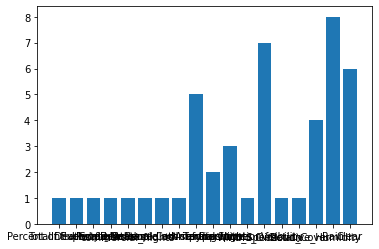

In [ ]:
# separate into input and output variables
array = dataset.values
# perform feature selection
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), n_features_to_select=11)
fit = rfe.fit(df_data, df_label)
# report selected features
print('Selected Features:')
names = dataset.columns.values[0:-1]
for i in range(len(fit.support_)):
	if fit.support_[i]:
		print(names[i])
# plot feature rank
names = dataset.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, fit.ranking_,)
pyplot.xticks(ticks, names)
pyplot.show()

## Escolha final de features:
Após fazer estes dois métodos de selecção de features, e visto que o seus resultados fazem bastante overlap, decidimos escolher as features resultantes iguais, bem como manter as diferentes. 

flights / commercial_flights / People Screened at Airports / US International Commercial Flights / Nr People not staying home / Nr of trips / Temperature /Precipitation / Wind_Speed / Relative_Humidity


Total Deaths /
Percent of Expected Deaths /
flights /
commercial_flights /
People Screened at Airports /
US International Commercial Flights /
Nr People not staying home /
Wind_Speed /
Visibility /
Cloud_Cover /

In [ ]:
df_data.columns

Index(['Total Deaths', 'Percent of Expected Deaths', 'flights',
       'commercial_flights', 'People Screened at Airports',
       'US International Commercial Flights', 'Nr People not staying home',
       'Nr of trips', 'Temperature', 'Precipitation', 'Wind_Speed',
       'Wind_Direction', 'Visibility', 'Cloud_Cover', 'Relative_Humidity',
       'Rain', 'Clear', 'Partially_cloudy'],
      dtype='object')

In [ ]:
df_data = df_data.drop(columns=['Total Deaths', 'Percent of Expected Deaths', 
       'Wind_Direction', 'Visibility', 'Cloud_Cover', 'Rain', 'Clear', 'Partially_cloudy'])
# df_data = df_data.drop(columns=['Wind_Direction', 'Rain', 'Clear', 'Partially_cloudy'])
df_data.shape

(66, 10)

In [ ]:
df_data.columns

Index(['flights', 'commercial_flights', 'People Screened at Airports',
       'US International Commercial Flights', 'Nr People not staying home',
       'Nr of trips', 'Temperature', 'Precipitation', 'Wind_Speed',
       'Relative_Humidity'],
      dtype='object')